In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
historic_data = pd.read_csv("historic.csv")
prediction_data = pd.read_csv("prediction_input.csv")

# Display basic information about the datasets
print("Historic Data:")
print(historic_data.info())
print("\nPrediction Data:")
print(prediction_data.info())








Historic Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB
None

Prediction Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_no         2000 non-null   int64  
 1   category        2000 non-null   object 
 2   main_promotion  2000 non-null   object 
 3   color           2000 non-null   object 
 4   stars           2000 non-nu

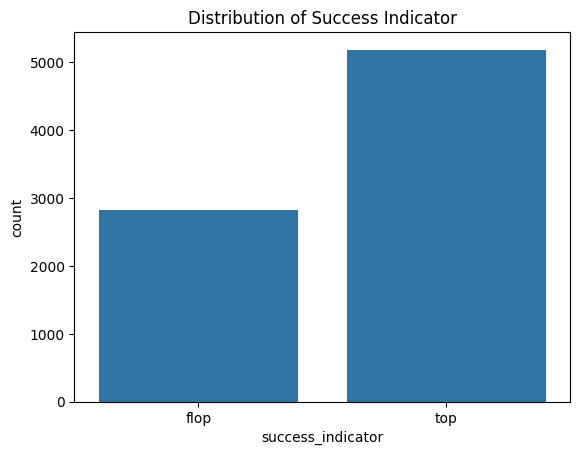

In [26]:
# Explore distribution of success indicator
sns.countplot(x='success_indicator', data=historic_data)
plt.title('Distribution of Success Indicator')
plt.show()

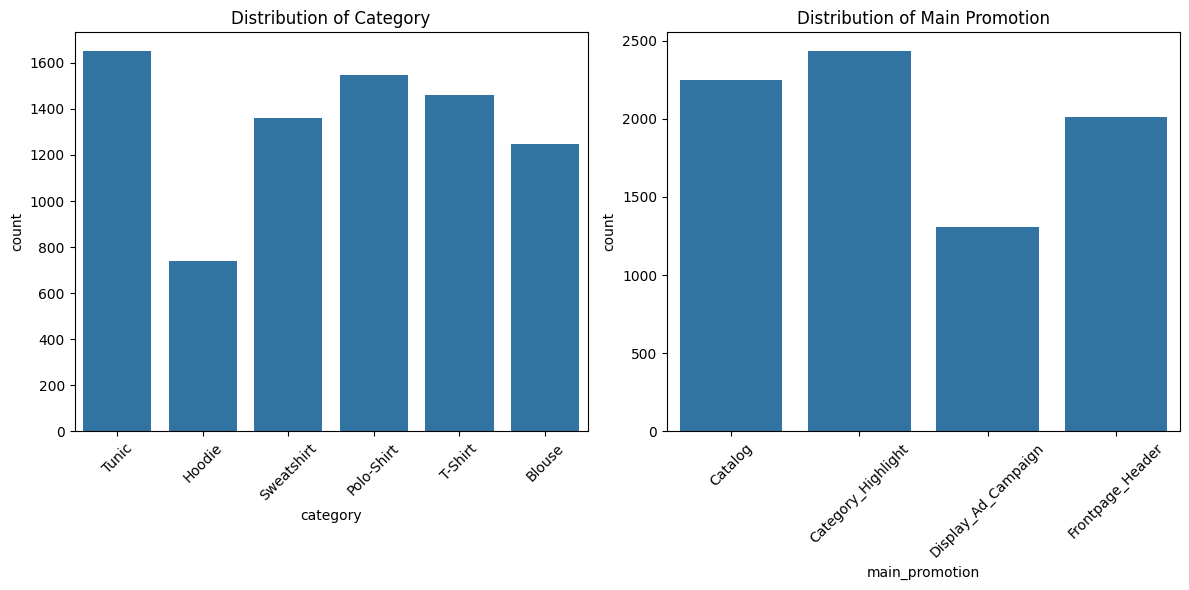

In [27]:

# Explore distribution of categorical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='category', data=historic_data)
plt.title('Distribution of Category')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.countplot(x='main_promotion', data=historic_data)
plt.title('Distribution of Main Promotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



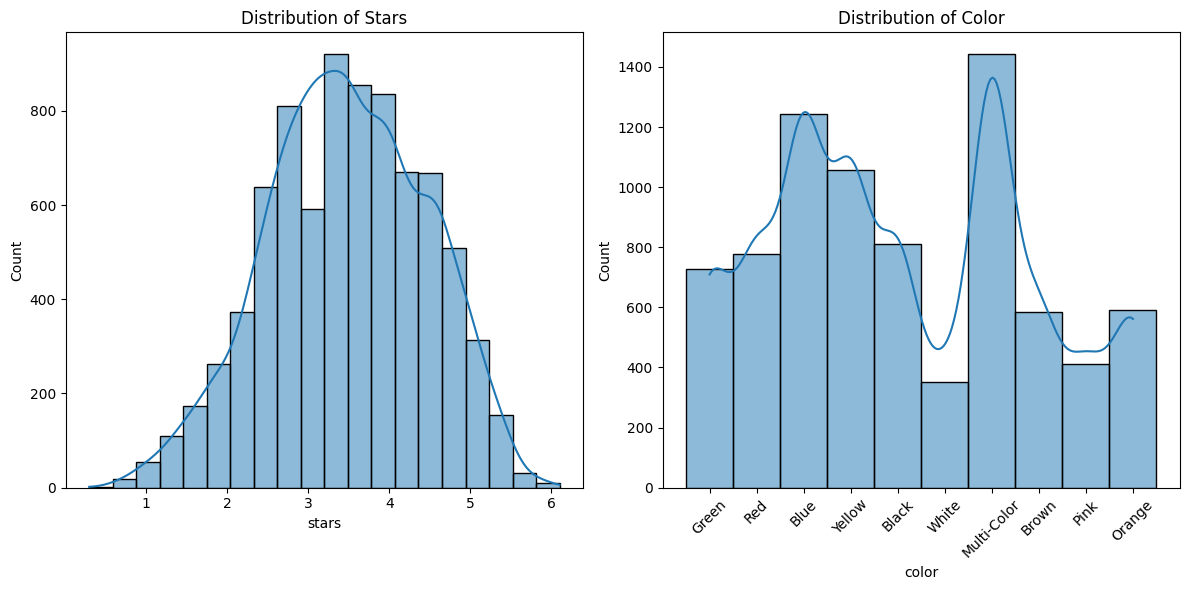

In [28]:
# Explore distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(historic_data['stars'], bins=20, kde=True)
plt.title('Distribution of Stars')
plt.subplot(1, 2, 2)
sns.histplot(historic_data['color'], bins=20, kde=True)
plt.title('Distribution of Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



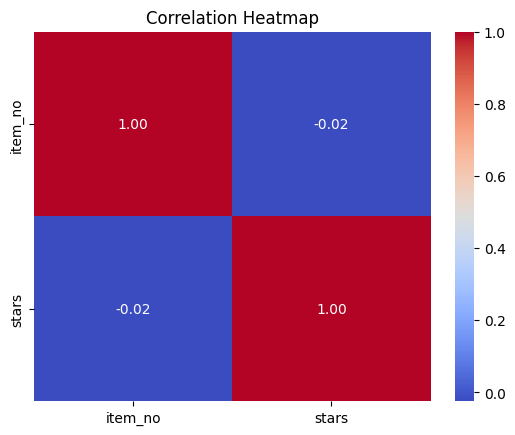

In [29]:
# Analyze correlation between numerical features
numeric_features = historic_data.select_dtypes(include=['float64', 'int64']).columns
corr = historic_data[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

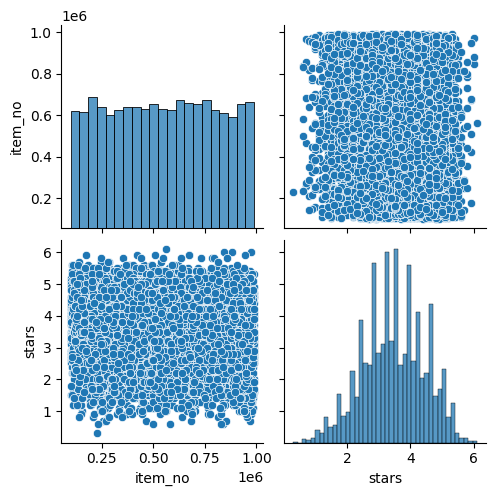

In [30]:
#visualize pairwise relationships between numerical features.
sns.pairplot(historic_data[numeric_features])
plt.show()


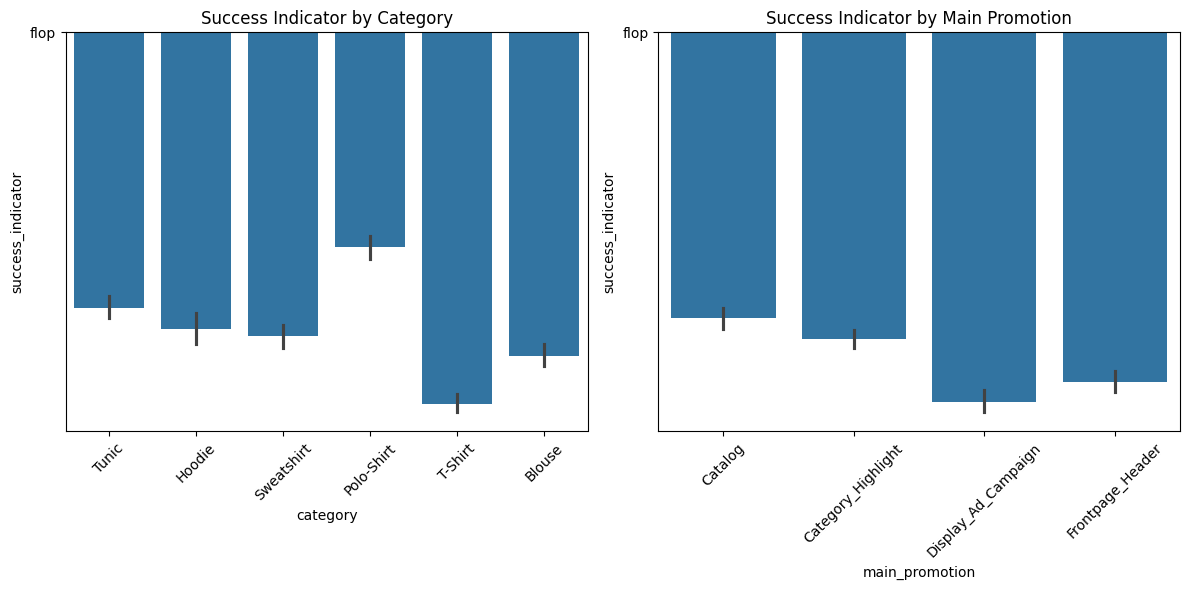

In [31]:
#distribution of success indicator for each category or main promotion.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='category', y='success_indicator', data=historic_data)
plt.title('Success Indicator by Category')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.barplot(x='main_promotion', y='success_indicator', data=historic_data)
plt.title('Success Indicator by Main Promotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


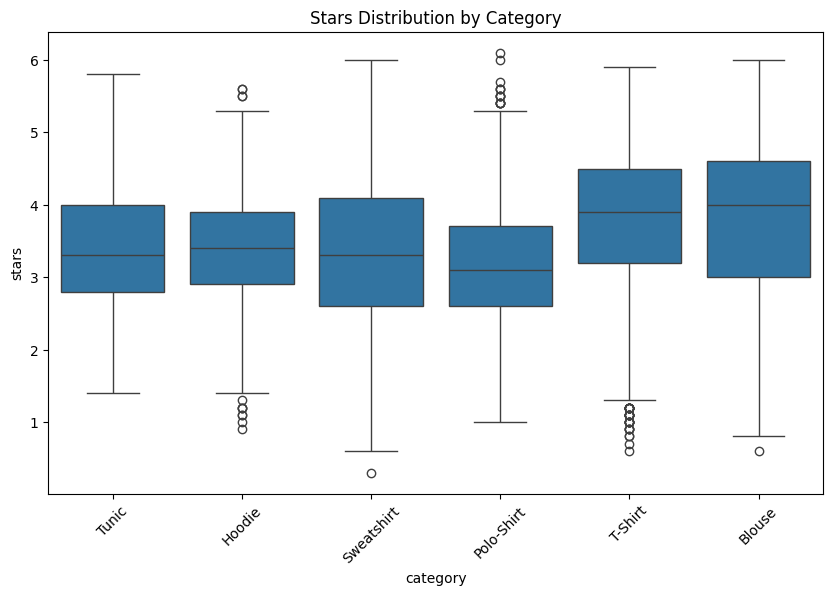

In [32]:
#visualizes the distribution of stars for each category.
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='stars', data=historic_data)
plt.title('Stars Distribution by Category')
plt.xticks(rotation=45)
plt.show()


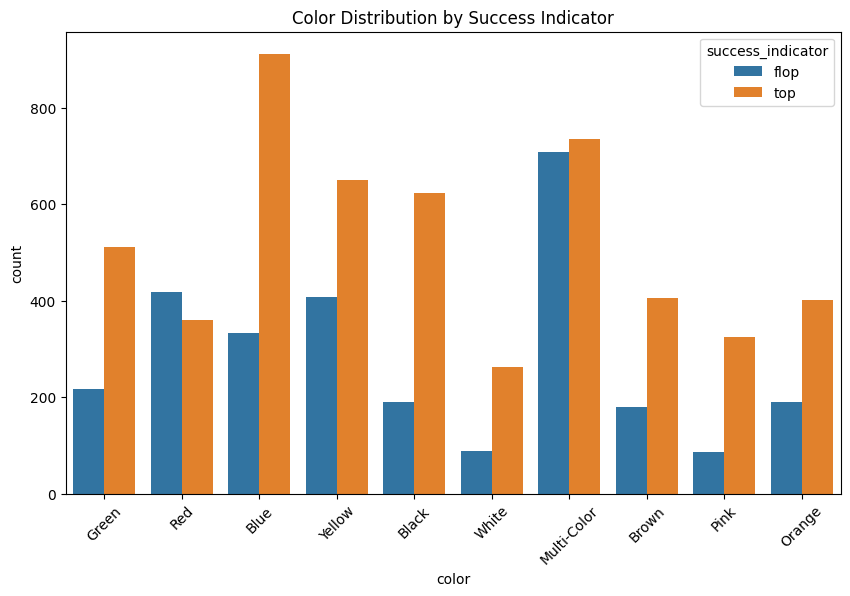

In [33]:
#count of each color for successful and unsuccessful products.
plt.figure(figsize=(10, 6))
sns.countplot(x='color', hue='success_indicator', data=historic_data)
plt.title('Color Distribution by Success Indicator')
plt.xticks(rotation=45)
plt.show()


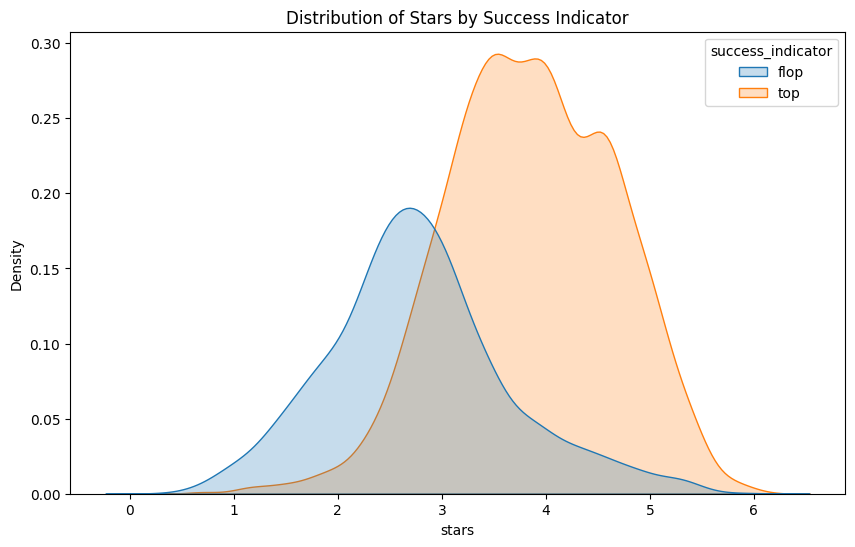

In [34]:
#the distribution of stars for successful and unsuccessful products.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=historic_data, x='stars', hue='success_indicator', fill=True)
plt.title('Distribution of Stars by Success Indicator')
plt.show()


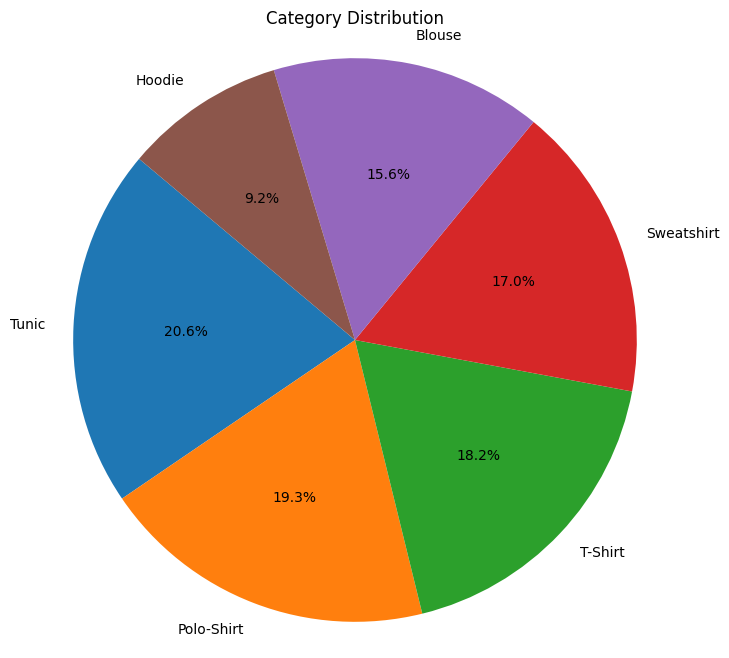

In [35]:
#Pie Chart for Category Distribution:
plt.figure(figsize=(8, 8))
category_counts = historic_data['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.axis('equal')
plt.show()


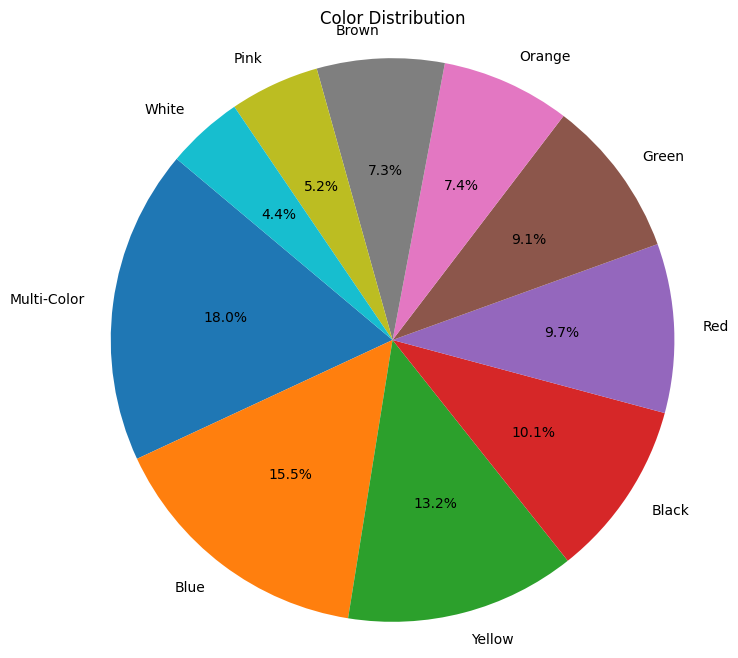

In [36]:
#Pie Chart for Color Distribution:
plt.figure(figsize=(8, 8))
color_counts = historic_data['color'].value_counts()
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Color Distribution')
plt.axis('equal')
plt.show()


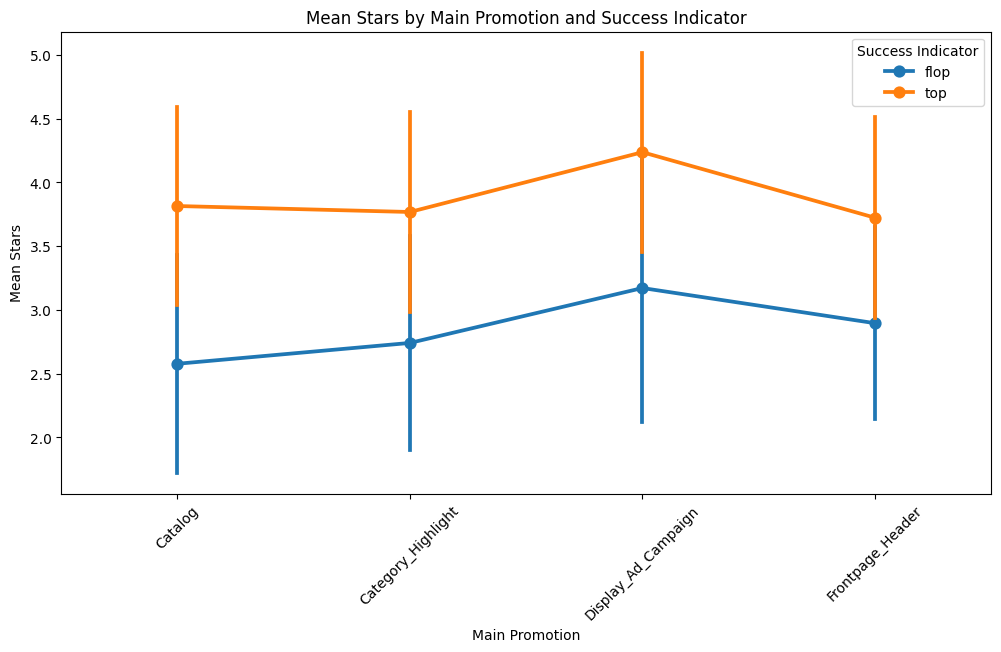

In [37]:
#Pointplot for Mean Stars by Main Promotion and Success Indicator:
plt.figure(figsize=(12, 6))
sns.pointplot(x='main_promotion', y='stars', hue='success_indicator', data=historic_data, errorbar='sd')
plt.title('Mean Stars by Main Promotion and Success Indicator')
plt.xlabel('Main Promotion')
plt.ylabel('Mean Stars')
plt.xticks(rotation=45)
plt.legend(title='Success Indicator')
plt.show()



In [38]:
# Value counts for categorical features
category_counts = historic_data['category'].value_counts()
print("Category Counts:")
print(category_counts)

promotion_counts = historic_data['main_promotion'].value_counts()
print("\nMain Promotion Counts:")
print(promotion_counts)

color_counts = historic_data['color'].value_counts()
print("\nColor Counts:")
print(color_counts)


Category Counts:
Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

Main Promotion Counts:
Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

Color Counts:
Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64


In [41]:
#Hypothesis Testing:
from scipy.stats import ttest_ind

success_stars = historic_data[historic_data['success_indicator'] == 'top']['stars']
flop_stars = historic_data[historic_data['success_indicator'] == 'flop']['stars']

t_statistic, p_value = ttest_ind(success_stars, flop_stars)
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 55.820439235030555
P-value: 0.0
